# Regresión Lineal

In [22]:
# Librerías
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [23]:
data = pd.read_csv('https://raw.githubusercontent.com/AnshTanwar/Global-Data-on-Sustainable-Energy/refs/heads/main/global-data-on-sustainable-energy%20(1).csv')
data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [41]:
#Imputando valores faltantes con la mediana
data['Access to electricity (% of population)'].fillna(data['Access to electricity (% of population)'].median(), inplace=True)
data['gdp_per_capita'].fillna(data['gdp_per_capita'].median(), inplace=True)

data['Access to clean fuels for cooking'].fillna(data['Access to clean fuels for cooking'].median(), inplace=True)
data['Primary energy consumption per capita (kWh/person)'].fillna(data['Primary energy consumption per capita (kWh/person)'].median(), inplace=True)

/tmp/ipykernel_11062/2773470123.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Access to electricity (% of population)'].fillna(data['Access to electricity (% of population)'].median(), inplace=True)
/tmp/ipykernel_11062/2773470123.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [42]:
data.isnull().sum()

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                                0
Access to clean fuels for cooking                                      0
Renewable-electricity-generating-capacity-per-capita                   0
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

In [43]:
# Preprocesamiento de datos para el modelo
X = data[['gdp_per_capita']]
y = data['Access to electricity (% of population)']

# Dividir mis registros en segmentos de entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=15)

# Entrenar mi modelo
modelo = LinearRegression()
modelo.fit(X_entrenamiento, y_entrenamiento)

# realizar predicciones
y_predicciones = modelo.predict(X_prueba)

#calcular del r2
r2 = modelo.score(X_prueba, y_prueba)
print("R2:", r2)

R2: 0.15726034036761372


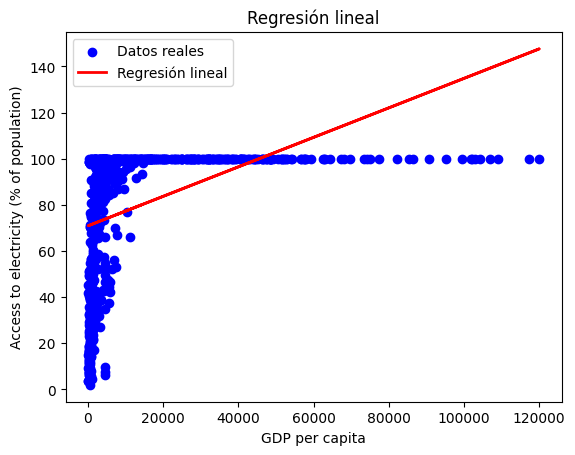

In [28]:
plt.scatter(X_prueba, y_prueba, color='blue', label='Datos reales')
plt.plot(X_prueba, y_predicciones, color='red', linewidth=2, label='Regresión lineal')
plt.xlabel('GDP per capita')
plt.ylabel('Access to electricity (% of population)')
plt.title('Regresión lineal')
plt.legend()
plt.show()

In [29]:
nuevos_datos = pd.DataFrame({'gdp_per_capita': [10000, 20000, 30000]})
predicciones = modelo.predict(nuevos_datos)
print(predicciones)

[77.23661142 83.63276699 90.02892256]


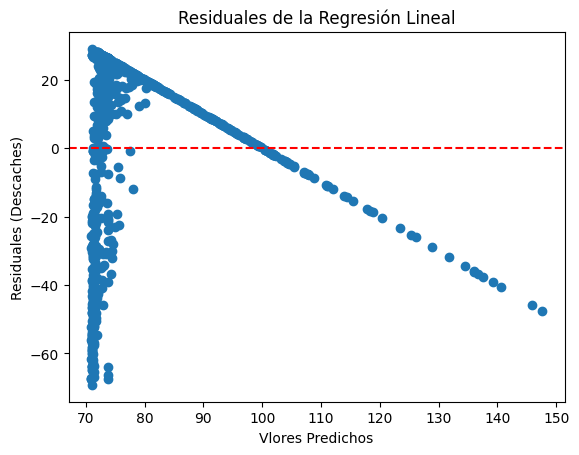

In [30]:
# Calcular los residuales
residuales = y_prueba - y_predicciones

# Visualizar los residuales
plt.scatter(y_predicciones, residuales)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Vlores Predichos')
plt.ylabel('Residuales (Descaches)')
plt.title('Residuales de la Regresión Lineal')
plt.show()

Tratando de mejorar el modelo

In [31]:
X_multi = data[['gdp_per_capita', 'Primary energy consumption per capita (kWh/person)', 'Access to clean fuels for cooking']]

X_entrenamiento_multi, X_prueba_multi, y_entrenamiento_multi, y_prueba_multi = train_test_split(X_multi, y, test_size=0.2, random_state=15)

modelo_multi = LinearRegression()
modelo_multi.fit(X_entrenamiento_multi, y_entrenamiento_multi)

y_predicciones_multi = modelo_multi.predict(X_prueba_multi)

r2_multi = modelo_multi.score(X_prueba_multi, y_prueba_multi)
print("R2:", r2_multi)

R2: 0.711168891787554


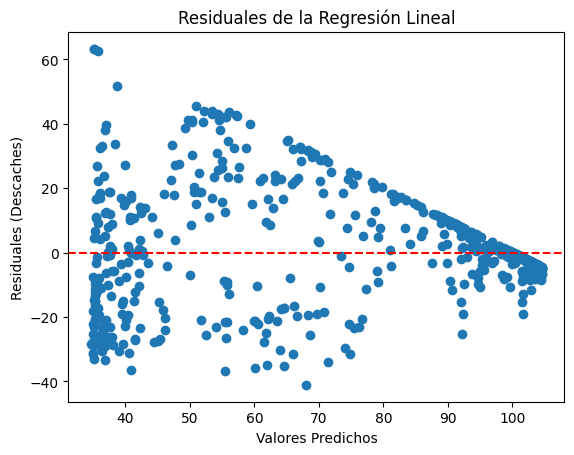

In [32]:
residuales = y_prueba_multi - y_predicciones_multi

plt.scatter(y_predicciones_multi, residuales)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuales (Descaches)')
plt.title('Residuales de la Regresión Lineal')
plt.show()

# Regresión Logística

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score


In [45]:
data['Access to electricity (% of population)'].fillna(data['Access to electricity (% of population)'].median(), inplace=True)
data['Access to clean fuels for cooking'].fillna(data['Access to clean fuels for cooking'].median(), inplace=True)
data['Renewable-electricity-generating-capacity-per-capita'].fillna(data['Renewable-electricity-generating-capacity-per-capita'].median(), inplace=True)

/tmp/ipykernel_11062/3024605580.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Access to clean fuels for cooking'].fillna(data['Access to clean fuels for cooking'].median(), inplace=True)
/tmp/ipykernel_11062/3024605580.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [35]:
data['Acceso > 50%'] = data['Access to electricity (% of population)'].apply(lambda x: 1 if x > 50 else 0)

In [54]:
X = data[['Renewable-electricity-generating-capacity-per-capita', 'Access to clean fuels for cooking']]

y = data['Acceso > 50%']

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
modelo = LogisticRegression()
modelo.fit(X_entrenamiento, y_entrenamiento)

y_predicciones = modelo.predict(X_prueba)

accuracy = modelo.score(X_prueba, y_prueba)
print("Ajuste. R2:", accuracy)

Ajuste. R2: 0.8986301369863013


In [56]:
matrix_confusion = confusion_matrix(y_prueba, y_predicciones)
print("Matriz de Confusión:")
print(matrix_confusion)

Matriz de Confusión:
[[114  32]
 [ 42 542]]


In [57]:
y_probabilidades = modelo.predict_proba(X_prueba)[:, 1]

fpr, tpr, thresholds = roc_curve(y_prueba, y_probabilidades)

curva_roc = roc_auc_score(y_prueba, y_probabilidades)
print("Curva ROC AUC:", curva_roc)

Curva ROC AUC: 0.9539665040345281


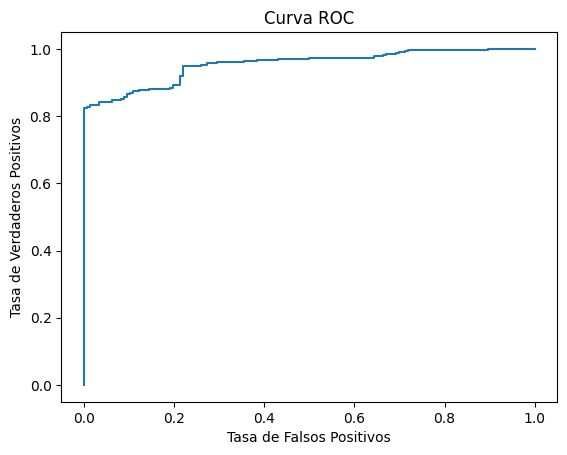

In [58]:
plt.plot(fpr, tpr, label='Curva ROC (área = %0.2f)' % curva_roc)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.show()

# Naive Bayes

In [ ]:
datos